In [1]:
from google.cloud import bigquery
from bq_helper import BigQueryHelper
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "world_bank_intl_education" dataset
dset_ref = client.dataset("world_bank_intl_education", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dset_ref)

# Construct a reference to the "international_education" table
table_ref = dset_ref.table("international_education")

# API request - fetch the table
table = client.get_table(table_ref)

Using Kaggle's public dataset BigQuery integration.


In [3]:
# Use client.list_tables to get information about the tables within the dataset.
[x.table_id for x in client.list_tables(dset_ref)]

['country_series_definitions',
 'country_summary',
 'international_education',
 'series_summary']

In [4]:
# Preview the first five lines of the "international_education" table
client.list_rows(table, max_results=5).to_dataframe()

,country_name,country_code,indicator_name,indicator_code,value,year
0,Uganda,UGA,"Population, male (% of total)",SP.POP.TOTL.MA.ZS,4.973407e+01,2016
1,Uzbekistan,UZB,Population of the official age for pre-primary...,SP.PRE.TOTL.IN,2.440150e+06,2016
2,Uzbekistan,UZB,Population of the official entrance age to pri...,UIS.SAP.1.G1,5.675960e+05,2016
3,Uzbekistan,UZB,Theoretical duration of lower secondary educat...,SE.SEC.DURS.LO,5.000000e+00,2016
4,Vanuatu,VUT,Population of the official entrance age to sec...,UIS.SAP.23.GPV.G1.M,3.020000e+03,2016


In [5]:
# Explore indicators 
sql0 = """
    SELECT DISTINCT(indicator_name),indicator_code
    FROM `bigquery-public-data.world_bank_intl_education.international_education`
"""

df_indicators = client.query(sql0).to_dataframe()
num_indicators = len(df_indicators.index)
print ('There are %d indicators'%(num_indicators))
df_indicators.head()


There are 3665 indicators


,indicator_name,indicator_code
0,Percentage of repeaters in Grade 4 of lower se...,UIS.REPP.2.GPV.G4
1,"Primary completion rate, both sexes (%)",SE.PRM.CMPT.ZS
2,Repeaters in Grade 3 of lower secondary genera...,UIS.R.2.GPV.G3.F
3,Repetition rate in Grade 2 of lower secondary ...,UIS.REPR.2.GPV.G2.F
4,"Teachers in secondary education, female (number)",SE.SEC.TCHR.FE


In [6]:
# Explore countries 
sql1 = """
    SELECT DISTINCT(country_name),country_code
    FROM `bigquery-public-data.world_bank_intl_education.international_education`
"""

df_country = client.query(sql1).to_dataframe()
num_country = len(df_country.index)
print ('There are %d countries'%(num_country))
df_country.head()

There are 242 countries


,country_name,country_code
0,Uganda,UGA
1,Uzbekistan,UZB
2,Vanuatu,VUT
3,Lebanon,LBN
4,Liberia,LBR


In [7]:
sql2 = """
    SELECT DISTINCT(year)
    FROM `bigquery-public-data.world_bank_intl_education.international_education`
    ORDER BY year
"""
df_year = client.query(sql2).to_dataframe()
num_year = len(df_year.index)
print ('There are %d years'%(num_year))
df_year.head()

There are 65 years


,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [8]:
df_year.tail()

,year
60,2080
61,2085
62,2090
63,2095
64,2100


In [9]:
# Drop data for years > 2017
sql3 = """
    SELECT * 
    FROM `bigquery-public-data.world_bank_intl_education.international_education`
    WHERE year < 2017 AND indicator_code = 'NY.GDP.PCAP.CD' OR indicator_code = 'UIS.SAP.CE' 
"""
df = client.query(sql3).to_dataframe()
num_count = len(df.index)
print ('There are %d lines of data'%(num_count))
df.head()

There are 11855 lines of data


,country_name,country_code,indicator_name,indicator_code,value,year
0,Barbados,BRB,GDP per capita (current US$),NY.GDP.PCAP.CD,15891.626549,2016
1,Upper middle income,UMC,GDP per capita (current US$),NY.GDP.PCAP.CD,7994.022621,2016
2,Madagascar,MDG,GDP per capita (current US$),NY.GDP.PCAP.CD,401.742270,2016
3,"Congo, Dem. Rep.",COD,GDP per capita (current US$),NY.GDP.PCAP.CD,405.542501,2016
4,St. Vincent and the Grenadines,VCT,GDP per capita (current US$),NY.GDP.PCAP.CD,7006.596196,2016


In [10]:
df_2016 = df[df['year'] == 2016]
df_2016.head()

,country_name,country_code,indicator_name,indicator_code,value,year
0,Barbados,BRB,GDP per capita (current US$),NY.GDP.PCAP.CD,15891.626549,2016
1,Upper middle income,UMC,GDP per capita (current US$),NY.GDP.PCAP.CD,7994.022621,2016
2,Madagascar,MDG,GDP per capita (current US$),NY.GDP.PCAP.CD,401.742270,2016
3,"Congo, Dem. Rep.",COD,GDP per capita (current US$),NY.GDP.PCAP.CD,405.542501,2016
4,St. Vincent and the Grenadines,VCT,GDP per capita (current US$),NY.GDP.PCAP.CD,7006.596196,2016


In [11]:
df_gdp = df_2016[df['indicator_code'] == 'NY.GDP.PCAP.CD']
df_ed = df_2016[df['indicator_code'] == 'UIS.SAP.CE']
df_ed.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,country_name,country_code,indicator_name,indicator_code,value,year
20,Haiti,HTI,"Population of compulsory school age, both sexe...",UIS.SAP.CE,1438058.0,2016
39,Trinidad and Tobago,TTO,"Population of compulsory school age, both sexe...",UIS.SAP.CE,113689.0,2016
47,Suriname,SUR,"Population of compulsory school age, both sexe...",UIS.SAP.CE,58399.0,2016
49,"Bahamas, The",BHS,"Population of compulsory school age, both sexe...",UIS.SAP.CE,63547.0,2016
56,Aruba,ABW,"Population of compulsory school age, both sexe...",UIS.SAP.CE,18000.0,2016


In [12]:
df_new = pd.merge(df_gdp, df_ed, on='country_code')
df_new.head()

,country_name_x,country_code,indicator_name_x,indicator_code_x,value_x,year_x,country_name_y,indicator_name_y,indicator_code_y,value_y,year_y
0,Barbados,BRB,GDP per capita (current US$),NY.GDP.PCAP.CD,15891.626549,2016,Barbados,"Population of compulsory school age, both sexe...",UIS.SAP.CE,41419.0,2016
1,St. Vincent and the Grenadines,VCT,GDP per capita (current US$),NY.GDP.PCAP.CD,7006.596196,2016,St. Vincent and the Grenadines,"Population of compulsory school age, both sexe...",UIS.SAP.CE,22214.0,2016
2,Antigua and Barbuda,ATG,GDP per capita (current US$),NY.GDP.PCAP.CD,14462.176279,2016,Antigua and Barbuda,"Population of compulsory school age, both sexe...",UIS.SAP.CE,16489.0,2016
3,Grenada,GRD,GDP per capita (current US$),NY.GDP.PCAP.CD,9841.764050,2016,Grenada,"Population of compulsory school age, both sexe...",UIS.SAP.CE,22145.0,2016
4,Dominica,DMA,GDP per capita (current US$),NY.GDP.PCAP.CD,7906.721671,2016,Dominica,"Population of compulsory school age, both sexe...",UIS.SAP.CE,11763.0,2016


In [13]:
df_new = df_new[['country_name_x','value_x','value_y']]

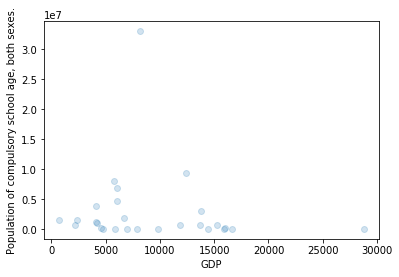

In [14]:
plt.scatter(df_new['value_x'], df_new['value_y'], alpha=0.2,cmap='viridis')
plt.xlabel('GDP')
plt.ylabel('Population of compulsory school age, both sexes.');